# <font color="purple">13-LimbDarkening</font> (template)

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Matplotlin patches -- module that enables patches in plots
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 

from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable()

## 1. In class: We can start by creating a polar grid (make sure to execute)

The grid represent the projected disk of a star on the sky, where $\alpha$ is the distance from the center of the disk (let's normalize the edge of the disk by $\alpha=1$), and $\varphi$ is the azimutal angle aroung the center of the disk. 

For later, we will also need the area on the sky represented by each grid point ($\sim\alpha d\alpha d\varphi$), as well as the value of $u$. We saw earlier in the course (when discussing intensity vs flux) that we can relate the value of $u$ and $\alpha$ by 
$$u = (1-\alpha^2)^{1/2}.$$

In [2]:
# Create a 2D grid in polar coordinates where 
# alpha is the radius from the center of the circle
# phi is the angle around the circle

n_phi = 1000 # number of phi angles
n_alpha = 1000   # number of radii

alpha = np.linspace(0, 1, n_alpha)
phi = np.radians(np.linspace(0, 360-(360/n_phi), n_phi))


#---------------------------------------
# In class


alpha_grid, phi_grid = np.meshgrid(alpha, phi)



#---------------------------------------
# We will need the projected area dA cos(theta)
# Area of a ring = 2 pi alpha dalpha
# Area of a rind segment = area of ring / number of segments

area_grid = 2*np.pi * alpha_grid * (1.0/n_alpha) / n_phi

# and the value of u=cos(theta)

u_grid = (1.0 - alpha_grid **2)**0.5

## 2. In class: Just a quick visualization of the grid

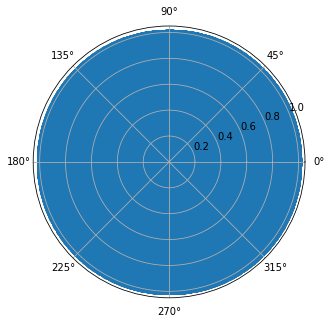

In [3]:
# We can get a figure in polar coordinate by using a "projection"
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection='polar'), figsize=(5,5))

#------------------------------
# In class

ax.scatter(phi_grid, alpha_grid)


## 3. In class: let's look at the effect of Limb-darkening

**IMPORTANT** Make sure to change the number of $\alpha$ and $\phi$ to 1000 in #1 and re-execute, to get a fine grid. 

> **TODO**: Below, provide an explanation (in words and math) that describes the calculations that we are performing in the code

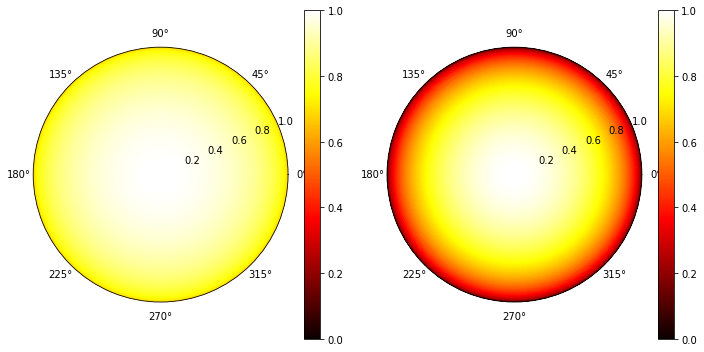

In [4]:
fig, ax = plt.subplots(1,2,subplot_kw=dict(projection='polar'), figsize=(10,5))

# Loading a colormap
cmap = plt.cm.hot

#--------------------------------------------
# In class

Source_slope = 0.5

I = ( 1 + Source_slope * u_grid) / (1 + Source_slope)

banana = ax[0].pcolormesh(phi_grid, alpha_grid, I, vmin=0, vmax=1.0, cmap=cmap)

plt.colorbar(banana, ax=ax[0])

# Copy paste, change ax and source function slope

Source_slope = 10

I = ( 1 + Source_slope * u_grid) / (1 + Source_slope)

banana = ax[1].pcolormesh(phi_grid, alpha_grid, I, vmin=0, vmax=1.0, cmap=cmap)

plt.colorbar(banana, ax=ax[1])

# ---------------------
plt.tight_layout()

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

As $\alpha$ increases the intensity decreases from the center of the "disk". This is further amplified in the case of the increased source slope, which is in line with what we would expect an increased slope to do.

## 4. A simple estimate of planet transit

Each point in our polar grid can be transformed into cartesian coodinates, as
$$x = \alpha \cos(\varphi)$$
$$y = \alpha \sin(\varphi)$$

The cartesian equation for a circle if radius $R$ centered on the coordinate $x_o$ and $y_o$ is 
$$(x - x_o)^2 + (y - y_o)^2 = R^2.$$

Therefore, if we place a place a planet anywhere on our star's disk, we can simply set the intensity to zero for every grid point where the following condition is met:
$$(x - x_o)^2 + (y - y_o)^2 \leq R^2!$$

To get the total flux coming out of the star, we can do a numerical integration by doing a sum of the product of $I$ * Area on the disk. (You can convince yourself that this is correct from our discussion of the observed intensity vs observed flux.)

The total flux without the planet is:  2.791809018531693
The total flux with the planet is:  2.66897344642792
The change is flux will be {:0.3g} 0.9560014416142346


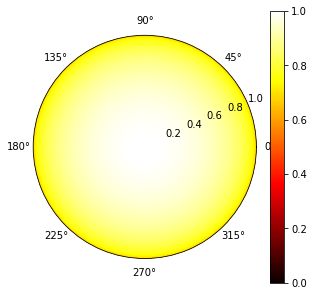

In [13]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(5,5))

Source_slope = 0.5
I = (1 + Source_slope*u_grid) / (1+Source_slope)

#--------------------------
# In class
# radius ratio of our planet

Re_Rsun = const.R_earth / const.R_sun

# Take a copy of the intensity grid

Flux_o = np.sum(I * area_grid)

# Where is the planet?

x0_array = np.linspace(-1-R,1+R,50) # array of xo to mimic a transit
y0 = 0
x_grid = alpha_grid * np.cos(phi_grid)
y_grid = alpha_grid * np.sin(phi_grid)

I_transit = np.copy(I)

for x0 in x0_array:
  I_transit = np.copy(I)
  planet = np.where( ( (x_grid - x0)**2 + (y_grid - y0)**2 ) <= R**2  )  
  I_transit[planet] = 0.0
  Flux_transit = np.append(F_transit, np.sum(I_transit * area_grid))

#----------------------------------
# In class, uncomment the following
# Make an image of the star + planet

co = ax.pcolormesh(phi_grid, alpha_grid, I_transit, cmap=cmap, vmin=0)
plt.colorbar(co)
#----------------------------------



# Find the total flux coming out of the star without the planet

print("The total flux without the planet is: ", Flux_o)

# Find the total flux coming out of the star with the planet

print("The total flux with the planet is: ", np.average(Flux_transit))


#----------------------------------
#In class, uncomment the following:

print('The change is flux will be {:0.3g}', np.average(Flux_transit) / Flux_o)
#----------------------------------


## 5. At home: by using a series of $x_o$ values, we can make a transit curve!

I provide a piece of code below that will create a transit curve, by making the planet (dark circle) cross the stellar disk horizontally. 

If you study the code, you will see that there are different parameters that you can modify. 

> **TODO**: use the code below to make a study of how the shape of the planet transit changes according to the different parameters. Make sure to include the effect of different limb darkening in your study. 
>
> In the interpretation box below, you will describe the results of your study, using graphs that you will create with the code to support your results. 

Text(0, 0.5, 'Ft/Fo')

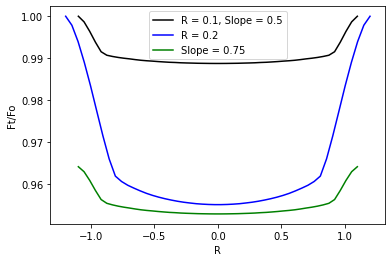

In [9]:
fig, ax = plt.subplots(1,1)


# Example for one set of parameters:
#-------------------------------------------------
#-------------------------------------------------
Source_slope = 0.5
I = (1 + Source_slope*u_grid) / (1+Source_slope)
Flux_o = np.sum(I * area_grid)
R = 0.1
# Where is the planet?
x0_array = np.linspace(-1-R,1+R,50) # array of xo to mimic a transit
y0 = 0
x_grid = alpha_grid * np.cos(phi_grid)
y_grid = alpha_grid * np.sin(phi_grid)

# The value of the transit are stored in "F_transit"
F_transit = np.array([])    
# Make the planet cross the star:
for x0 in x0_array:
  I_transit = np.copy(I)
  planet = np.where( ( (x_grid - x0)**2 + (y_grid - y0)**2 ) <= R**2  )  
  I_transit[planet] = 0.0
  F_transit = np.append(F_transit, np.sum(I_transit * area_grid))

ax.plot(x0_array, F_transit/Flux_o, c='k', label="R = 0.1, Slope = 0.5") 
#-------------------------------------------------
#-------------------------------------------------



# At home, make a few transit light curves for a set of parameters.
# How does the shape of the transit changes if 
# the radius of the planet, or the limb-darneking of the star changes?

R = 0.2

x0_array = np.linspace(-1-R,1+R,50)

F_transit = np.array([])

for x0 in x0_array:
  I_transit = np.copy(I)
  planet = np.where( ( (x_grid - x0)**2 + (y_grid - y0)**2 ) <= R**2  )  
  I_transit[planet] = 0.0
  F_transit = np.append(F_transit, np.sum(I_transit * area_grid))

ax.plot(x0_array, F_transit/Flux_o, c='b', label="R = 0.2") 

Source_slope = 0.75
I = (1 + Source_slope*u_grid) / (1+Source_slope)
R = 0.1

x0_array = np.linspace(-1-R,1+R,50)

F_transit = np.array([])

for x0 in x0_array:
  I_transit = np.copy(I)
  planet = np.where( ( (x_grid - x0)**2 + (y_grid - y0)**2 ) <= R**2  )  
  I_transit[planet] = 0.0
  F_transit = np.append(F_transit, np.sum(I_transit * area_grid))

ax.plot(x0_array, F_transit/Flux_o, c='g', label="Slope = 0.75") 

ax.legend(loc=0)
ax.set_xlabel("R")
ax.set_ylabel("Ft/Fo")

> **TODO**: Describe your results (and interpretation of your results) here. 

The graph shows the effects of changing the different parameters. When the radius is changed, higher or lower, the flux changes more or less as the planet passes through the star, but remains consistent with the reference for the start and finish ratios. However, in the case of the larger source slope, the flux change stays relatively consistent, but the overall values for the flux are effected, ie. a larger slope means that the flux starts lower.